<a href="https://colab.research.google.com/github/umleeho1/AI_learning/blob/main/semifinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **개요**

설명
- 문제 정의
- 프로젝트 목표
- 데이터 수집
- 문제해결 방법

**문제정의**

- 의정부시의 지하철이 특정 시간에 혼잡한 경우가 많아 사람들이 불편을 겪고있다. 모든 시간대에 지하철 수나 대중교통 수를 늘려버리면 예산적으로 손해가 클 수 있다. 따라서 특정 시간대의 혼잡도를 조사하고 그 시간대에 대중 교통을 늘리는 방법을 찾아보자.

**데이터수집**

- 데이터 출처 https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15069808 에 있는 의정부 지하철 혼잡도데이터입니다.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os


In [ ]:

raw_data = pd.read_csv('/content/경기도 의정부시_의정부경전철 혼잡도_20201016.csv', encoding='cp949')


raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   평일공휴일구분     56 non-null     object 
 1   호선          56 non-null     object 
 2   상하선구분       56 non-null     object 
 3   역명          56 non-null     object 
 4   혼잡율(5:00)   56 non-null     float64
 5   혼잡율(6:00)   56 non-null     float64
 6   혼잡율(7:00)   56 non-null     float64
 7   혼잡율(8:00)   56 non-null     float64
 8   혼잡율(9:00)   56 non-null     float64
 9   혼잡율(10:00)  56 non-null     float64
 10  혼잡율(11:00)  56 non-null     float64
 11  혼잡율(12:00)  56 non-null     float64
 12  혼잡율(13:00)  56 non-null     float64
 13  혼잡율(14:00)  56 non-null     float64
 14  혼잡율(15:00)  56 non-null     float64
 15  혼잡율(16:00)  56 non-null     float64
 16  혼잡율(17:00)  56 non-null     float64
 17  혼잡율(18:00)  56 non-null     float64
 18  혼잡율(19:00)  56 non-null     float64
 19  혼잡율(20:00)  56 non-null     flo

In [ ]:
raw_data.head()

,평일공휴일구분,호선,상하선구분,역명,혼잡율(5:00),혼잡율(6:00),혼잡율(7:00),혼잡율(8:00),혼잡율(9:00),혼잡율(10:00),...,혼잡율(15:00),혼잡율(16:00),혼잡율(17:00),혼잡율(18:00),혼잡율(19:00),혼잡율(20:00),혼잡율(21:00),혼잡율(22:00),혼잡율(23:00),혼잡율(24:00)
0,평일,의정부경전철,상선,송산,1.57,1.10,1.86,5.94,3.92,3.76,...,3.71,4.16,3.57,2.65,1.31,1.04,1.04,0.84,1.16,0.00
1,평일,의정부경전철,상선,어룡,4.13,2.33,4.11,11.44,8.38,9.21,...,8.96,8.66,8.06,6.61,3.47,2.97,2.72,2.13,2.97,0.25
2,평일,의정부경전철,상선,곤제,6.52,4.53,7.57,22.31,16.37,15.69,...,15.20,15.84,14.82,14.97,8.24,6.93,6.24,4.75,5.86,1.49
3,평일,의정부경전철,상선,효자,7.67,5.45,8.65,26.18,18.96,18.56,...,16.73,17.03,16.02,16.28,9.23,7.87,6.73,5.25,6.19,1.49
4,평일,의정부경전철,상선,경기도청북부청사,7.92,5.59,8.71,25.86,20.18,20.20,...,19.06,19.75,18.56,16.86,9.65,8.02,6.93,5.45,6.68,1.49


In [ ]:
# 필요한 열 선택 #데이터 전처리 및 가공
columns = ['평일공휴일구분', '호선', '상하선구분', '역명', '혼잡율(5:00)', '혼잡율(6:00)', '혼잡율(7:00)', '혼잡율(8:00)', '혼잡율(9:00)', '혼잡율(10:00)',
           '혼잡율(11:00)', '혼잡율(12:00)', '혼잡율(13:00)', '혼잡율(14:00)', '혼잡율(15:00)', '혼잡율(16:00)', '혼잡율(17:00)', '혼잡율(18:00)',
           '혼잡율(19:00)', '혼잡율(20:00)', '혼잡율(21:00)', '혼잡율(22:00)', '혼잡율(23:00)', '혼잡율(24:00)']
data = raw_data[columns]

print(data)

   평일공휴일구분      호선 상하선구분        역명  혼잡율(5:00)  혼잡율(6:00)  혼잡율(7:00)  \
0       평일  의정부경전철    상선        송산       1.57       1.10       1.86   
1       평일  의정부경전철    상선        어룡       4.13       2.33       4.11   
2       평일  의정부경전철    상선        곤제       6.52       4.53       7.57   
3       평일  의정부경전철    상선        효자       7.67       5.45       8.65   
4       평일  의정부경전철    상선  경기도청북부청사       7.92       5.59       8.71   
5       평일  의정부경전철    상선        새말       8.50       5.91       9.64   
6       평일  의정부경전철    상선        동오       9.74       6.44      10.92   
7       평일  의정부경전철    상선     의정부중앙      10.97       7.11      11.76   
8       평일  의정부경전철    상선        흥선       8.91       6.08      10.43   
9       평일  의정부경전철    상선     의정부시청       9.49       6.12       9.90   
10      평일  의정부경전철    상선    경전철의정부       8.50       5.87       8.56   
11      평일  의정부경전철    상선        범골       7.18       5.27       7.22   
12      평일  의정부경전철    상선        회룡       7.76       5.62       7.13   
13    

In [ ]:
# 평일 데이터 추출 #전처리 및 가공
weekday_data = data.iloc[:24, :]

# 공휴일 데이터 추출 #전처리 및가공
holiday_data = data.iloc[24:48, :]

In [ ]:
weekday_data.info

<bound method DataFrame.info of    평일공휴일구분      호선 상하선구분        역명  혼잡율(5:00)  혼잡율(6:00)  혼잡율(7:00)  \
0       평일  의정부경전철    상선        송산       1.57       1.10       1.86   
1       평일  의정부경전철    상선        어룡       4.13       2.33       4.11   
2       평일  의정부경전철    상선        곤제       6.52       4.53       7.57   
3       평일  의정부경전철    상선        효자       7.67       5.45       8.65   
4       평일  의정부경전철    상선  경기도청북부청사       7.92       5.59       8.71   
5       평일  의정부경전철    상선        새말       8.50       5.91       9.64   
6       평일  의정부경전철    상선        동오       9.74       6.44      10.92   
7       평일  의정부경전철    상선     의정부중앙      10.97       7.11      11.76   
8       평일  의정부경전철    상선        흥선       8.91       6.08      10.43   
9       평일  의정부경전철    상선     의정부시청       9.49       6.12       9.90   
10      평일  의정부경전철    상선    경전철의정부       8.50       5.87       8.56   
11      평일  의정부경전철    상선        범골       7.18       5.27       7.22   
12      평일  의정부경전철    상선        회룡       7.76

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


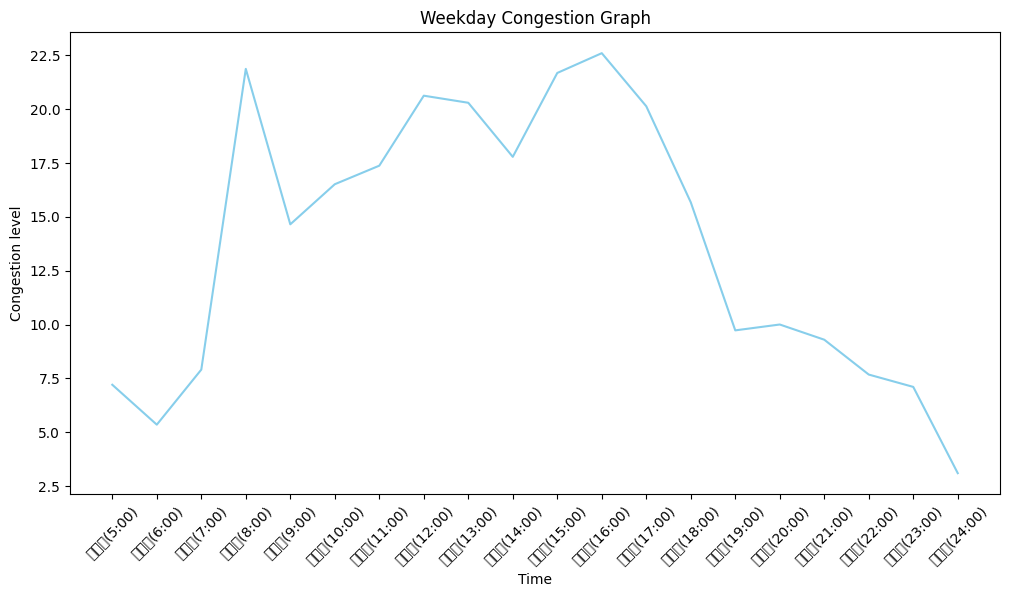

In [ ]:
import matplotlib.pyplot as plt

# 시간대별 혼잡율 열 선택
time_columns = ['혼잡율(5:00)', '혼잡율(6:00)', '혼잡율(7:00)', '혼잡율(8:00)', '혼잡율(9:00)', '혼잡율(10:00)',
                '혼잡율(11:00)', '혼잡율(12:00)', '혼잡율(13:00)', '혼잡율(14:00)', '혼잡율(15:00)', '혼잡율(16:00)',
                '혼잡율(17:00)', '혼잡율(18:00)', '혼잡율(19:00)', '혼잡율(20:00)', '혼잡율(21:00)', '혼잡율(22:00)',
                '혼잡율(23:00)', '혼잡율(24:00)']

# 시간대별 평균 혼잡율 계산
mean_congestion = weekday_data[time_columns].mean()

# 폰트 설정
plt.rcParams['font.family'] = 'sans-serif'

# 그래프 그리기
plt.figure(figsize=(12, 6))
mean_congestion.plot(kind='line', color='skyblue')
plt.xlabel('Time')
plt.ylabel('Congestion level')
plt.title('Weekday Congestion Graph')
plt.xticks(range(len(time_columns)), time_columns, rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


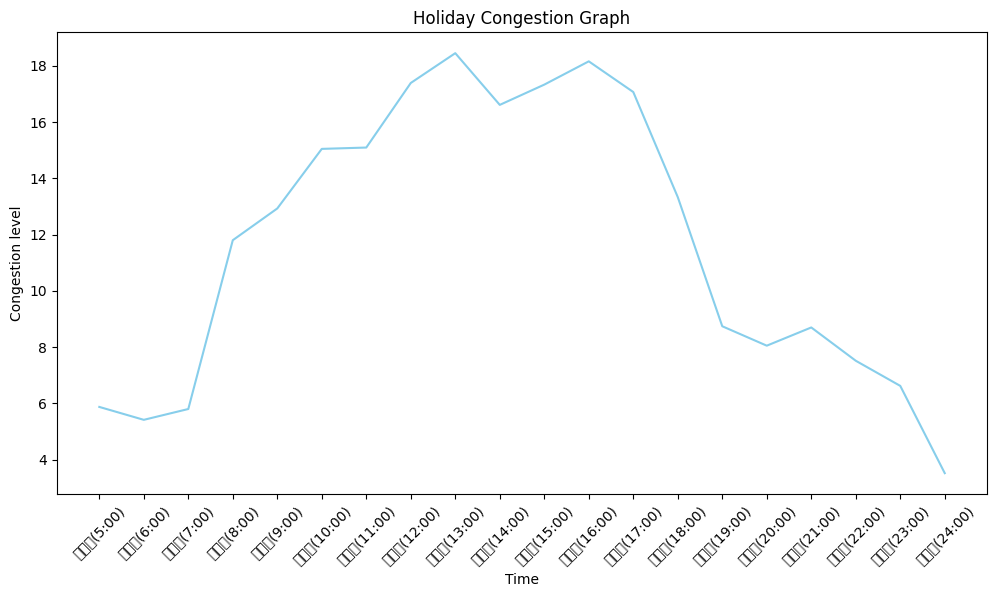

In [ ]:
import matplotlib.pyplot as plt

# 시간대별 혼잡율 열 선택
time_columns = ['혼잡율(5:00)', '혼잡율(6:00)', '혼잡율(7:00)', '혼잡율(8:00)', '혼잡율(9:00)', '혼잡율(10:00)',
                '혼잡율(11:00)', '혼잡율(12:00)', '혼잡율(13:00)', '혼잡율(14:00)', '혼잡율(15:00)', '혼잡율(16:00)',
                '혼잡율(17:00)', '혼잡율(18:00)', '혼잡율(19:00)', '혼잡율(20:00)', '혼잡율(21:00)', '혼잡율(22:00)',
                '혼잡율(23:00)', '혼잡율(24:00)']

# 시간대별 평균 혼잡율 계산
mean_congestion = holiday_data[time_columns].mean()

# 폰트 설정
plt.rcParams['font.family'] = 'sans-serif'

# 그래프 그리기
plt.figure(figsize=(12, 6))
mean_congestion.plot(kind='line', color='skyblue')
plt.xlabel('Time')
plt.ylabel('Congestion level')
plt.title('Holiday Congestion Graph')
plt.xticks(range(len(time_columns)), time_columns, rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


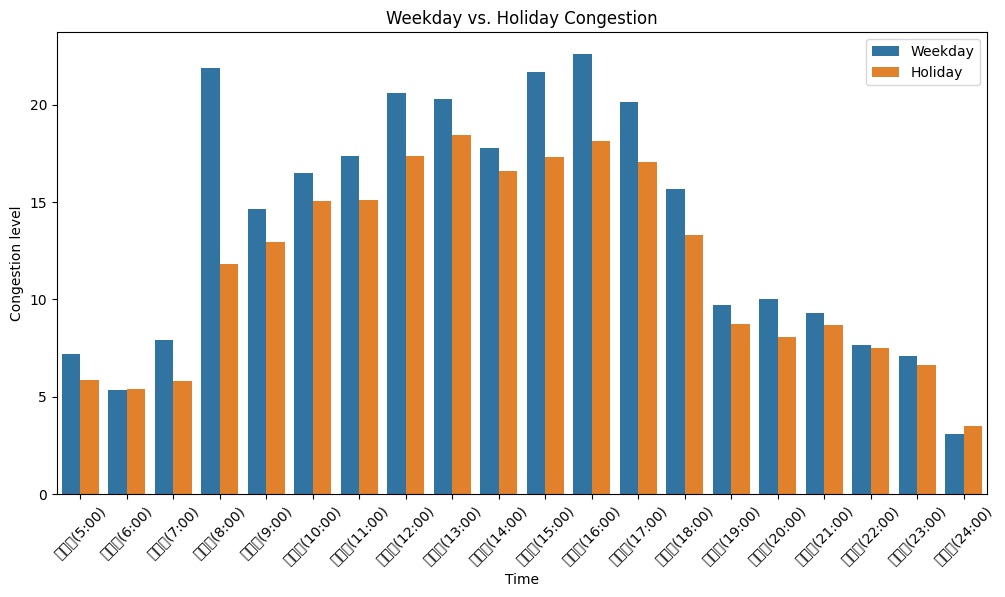

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시간대별 혼잡율 열 선택
time_columns = ['혼잡율(5:00)', '혼잡율(6:00)', '혼잡율(7:00)', '혼잡율(8:00)', '혼잡율(9:00)', '혼잡율(10:00)',
                '혼잡율(11:00)', '혼잡율(12:00)', '혼잡율(13:00)', '혼잡율(14:00)', '혼잡율(15:00)', '혼잡율(16:00)',
                '혼잡율(17:00)', '혼잡율(18:00)', '혼잡율(19:00)', '혼잡율(20:00)', '혼잡율(21:00)', '혼잡율(22:00)',
                '혼잡율(23:00)', '혼잡율(24:00)']

# 시간대별 평균 혼잡율 계산
weekday_mean_congestion = weekday_data[time_columns].mean()
holiday_mean_congestion = holiday_data[time_columns].mean()

# 데이터프레임 생성
df = pd.DataFrame({
    'Time': time_columns,
    'Weekday': weekday_mean_congestion,
    'Holiday': holiday_mean_congestion
})

# 데이터프레임을 "long" 형식으로 변환
df_long = df.melt(id_vars='Time', var_name='Type', value_name='Congestion')

# 폰트 설정
plt.rcParams['font.family'] = 'sans-serif'

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='Time', y='Congestion', hue='Type', data=df_long)
plt.xlabel('Time')
plt.ylabel('Congestion level')
plt.title('Weekday vs. Holiday Congestion')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# 시간대별 혼잡율 열 선택
time_columns = ['혼잡율(5:00)', '혼잡율(6:00)', '혼잡율(7:00)', '혼잡율(8:00)', '혼잡율(9:00)', '혼잡율(10:00)',
                '혼잡율(11:00)', '혼잡율(12:00)', '혼잡율(13:00)', '혼잡율(14:00)', '혼잡율(15:00)', '혼잡율(16:00)',
                '혼잡율(17:00)', '혼잡율(18:00)', '혼잡율(19:00)', '혼잡율(20:00)', '혼잡율(21:00)', '혼잡율(22:00)',
                '혼잡율(23:00)', '혼잡율(24:00)']

# 시간대별 평균 혼잡율 계산
weekday_mean_congestion = weekday_data[time_columns].mean()
holiday_mean_congestion = holiday_data[time_columns].mean()

# 폰트 설정
plt.rcParams['font.family'] = 'sans-serif'

# 데이터프레임 생성
df = pd.DataFrame({
    'Time': time_columns,
    'Weekday Congestion': weekday_mean_congestion,
    'Holiday Congestion': holiday_mean_congestion
})

# 혼잡율이 가장 높은 시간대 10개 선택
top_10_congestion = df.nlargest(10, 'Weekday Congestion')

# 그래프 그리기
fig = go.Figure()
fig.add_trace(go.Bar(x=top_10_congestion['Time'], y=top_10_congestion['Weekday Congestion'], name='Weekday'))
fig.add_trace(go.Bar(x=top_10_congestion['Time'], y=top_10_congestion['Holiday Congestion'], name='Holiday'))
fig.update_layout(
    title='Top 10 Congestion Hours (Weekday vs Holiday)',
    xaxis_title='Time',
    yaxis_title='Congestion level',
    barmode='group'
)
fig.show()


**문제해결**

- 이 그래프들을 통해 휴일에 지하철 확충이 더욱 필요하고 위 10개의 시간대에 지하철 버스 확충이 필요하다는 것을 알 수있다